# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [224]:
# Installing the library version, which is needed to remove all warnings and errors.
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user # import libraries for data manipulation

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [225]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [226]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
# Write your code here to read the
df = pd.read_csv('/content/drive/MyDrive/Python M1 Project/foodhub_order.csv')

In [228]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [229]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.




```
# This is formatted as code
```

#### Observations:


There are 1898 rows and 9 columns in the Foodhub Order.csv file


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [230]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There are overall 9 columns, with 4 columns as order_id, customer_id, food_preparation_time and delivery_time with (int64) data type, cost_of_the_order column with float64 data type and the remaining 4 columns as restaurant_name, cusiine_type, cost_of_the_order and rating with object/string data type.

Rating column is read as object/string dara type but it should be a numerical column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [231]:
# Write your code here
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [232]:
# Although the above output shows no missing data, when counting sum of null values
# let's see why BuildingArea column has object data type
df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

* Answer for this Question: No there are no missing values in the data - as the isnull().sum() - summation or count of null values in the columns of each of the data is zero(0), implying there are no missing values..



* However on the contrary, if we would treat the 'Not given' values to be missing data in the rating field, then the steps for imputing the 'Not given' values with Mean, are detailed below:-

In [233]:
# Let's check other string / object columns as well
df['restaurant_name'].unique()


array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [234]:
df['cuisine_type'].unique()


array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [235]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [236]:
# Upon checking on the string object's unique value only the column has 'Not given' as a value, hence making it a string object
# using na_values to tell python which values it should consider as NaN
df_new = pd.read_csv('/content/drive/MyDrive/Python M1 Project/foodhub_order.csv',na_values=['Not given'])
df_new['rating'].dtype

dtype('float64')

In [237]:
#We observe that now rating column is being considered as float after the 'Not given'was read as NaN - Not a Number.
# Checking for missing values in the data
df_new.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations:


* Now we have 736 records, which had rating as 'Not Given' or missing rating values, which have been replaced with NaN as shown below.

In [238]:
df_new.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


* So, before imputing missing values with central values of let us investigate the missing data closely to observe the pattern of missing values, and then take a decision to impute the missing value with appropriate measure.

* Lets see the count and the percentage of missing values in each column


In [239]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df_new.isnull().sum()[df_new.isnull().sum()>0],'Percentage':(df_new.isnull().sum()[df_new.isnull().sum()>0]/df_new.shape[0])*100})

,Count,Percentage
rating,736,38.777661


* As we know, the only column with missing values is rating column with it's count of around 736 records, hence providing an opportunity for imputation..

In [240]:
# extracting all the null data of rating field
df_new[df_new['rating'].isna()]
#df_new.loc[df_new['rating'].isna()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


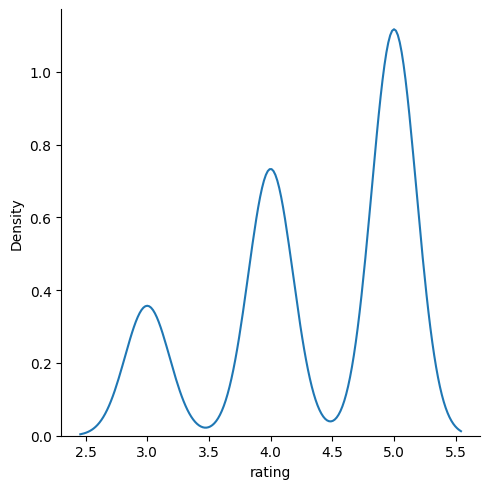

In [241]:
# Missing value Treatments can be done only after understanding the skewness in the distribution and to find outliers if any, hence plotting charts is required
# For skewness in a single variable called Univariate analysis - histogram plot / displot with kde (Kernel Density estimation)
sns.displot(data=df_new, x='rating',kind='kde')
plt.savefig("output.jpg", bbox_inches='tight')


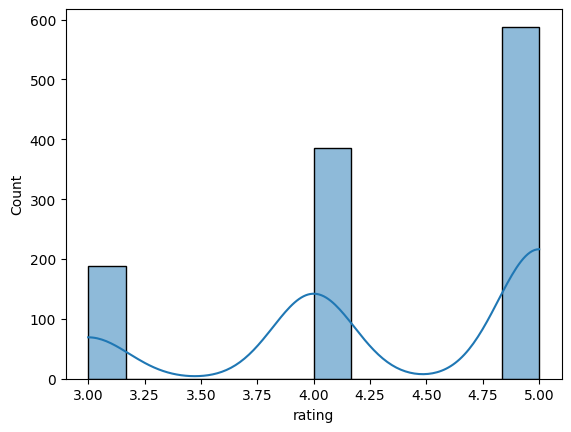

In [242]:
# Histogram plot
sns.histplot(data=df_new, x='rating',kde=True)
plt.savefig("output.jpg", bbox_inches='tight')

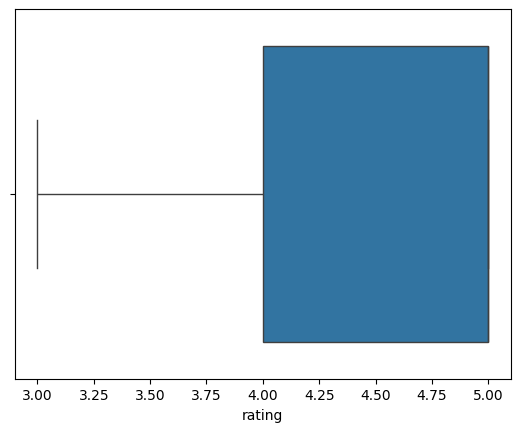

In [243]:
# For outlier's detection in a single variable called Univariate analysis - histogram plot
sns.boxplot(data=df_new, x='rating')
plt.savefig("output.jpg", bbox_inches='tight')

In [244]:
# From the describe() method and from the above charts it could be inferred that the mean < median, therefore it is slightly Negatively skewed or left skewed
# but as we do not have any outliers as inferred from the boxplot above, hence it would be correct to impute missing values of rating column with MEAN.
df_new['rating'].describe()

,rating
count,1162.000000
mean,4.344234
std,0.741478
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [245]:
# Imputing the missing values of rating column with it's mean
df_final = df_new.copy()
df_final['rating'] = df_new['rating'].fillna(value = df_new['rating'].mean())

** We have successfully imputed the values of rating column with it's mean value using the fillna() function



In [246]:
# Checking the 736 rows where the mean of rating is updated to be the new rating value
df_final.loc[df_final['rating'] == 4.344234079173838]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.344234,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.344234,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4.344234,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,4.344234,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,4.344234,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,4.344234,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,4.344234,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,4.344234,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.344234,31,24


In [247]:
# Finally, ensuring there are no null values in the data
df_final.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [248]:
# Describe function on the data file would provide all the statistical info as required
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


* Using the describe function on the final dataframe file, the following details are observed on the food preparation time:-

(A): Minimum value is 20.00 minutes
(B): Average value is 27.37 minutes or 27 mins and 22seconds
(C): Maximum value is 35 minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [249]:
# Write the code here
# From the initial file as given, the number of ratings that were not rated is to be picked up
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


* From the file given for analysis, there are 736 orders out of 1898 that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [250]:
# Write the code here
# Order ids
df['order_id'].nunique()



1898

* There are 1898 unique orders being made as inferred from the FoodHub company dataset. Much of Univariate analysis on this field is not possible as the number of orders correspond to the number of records in dataset

In [251]:
# check unique customer ID
df['customer_id'].nunique()

1200

* There are a total of 1200 unique customers, while the number of orders listed is 1898 - implies approximately 1.5 orders done by each Customer.  Much of Univariate analysis on this field is not possible as customer_id is an id only field.

In [252]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

* There are overall 178 unique restaurants in New York, from the FoodHub dataset

In [253]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

* There are overall only 14 cuisine types in this dataset

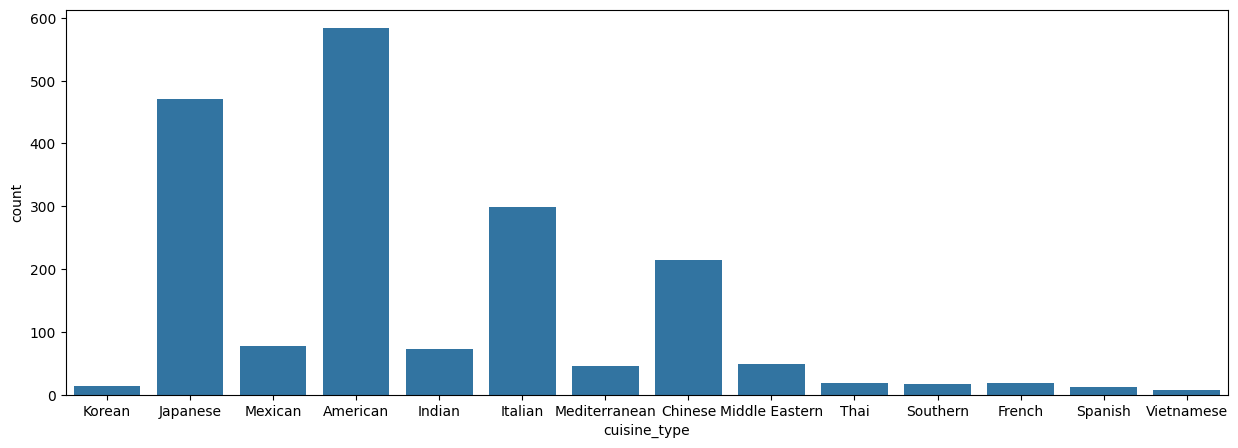

In [254]:
# Countplot or Bar chart / graph equivalent created on cuisine type - Categorical data
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* American, Japanese, Italian and Chinese are the top 4 favourite cuisine types
* The cuisine type will be an interesting field in our recommendations, to promote FoodHub's business in New York.
* The appetite for the local cusine (American) is evident, however among multi-cultural cuisines - Japanese stands way ahead compared to the rest.

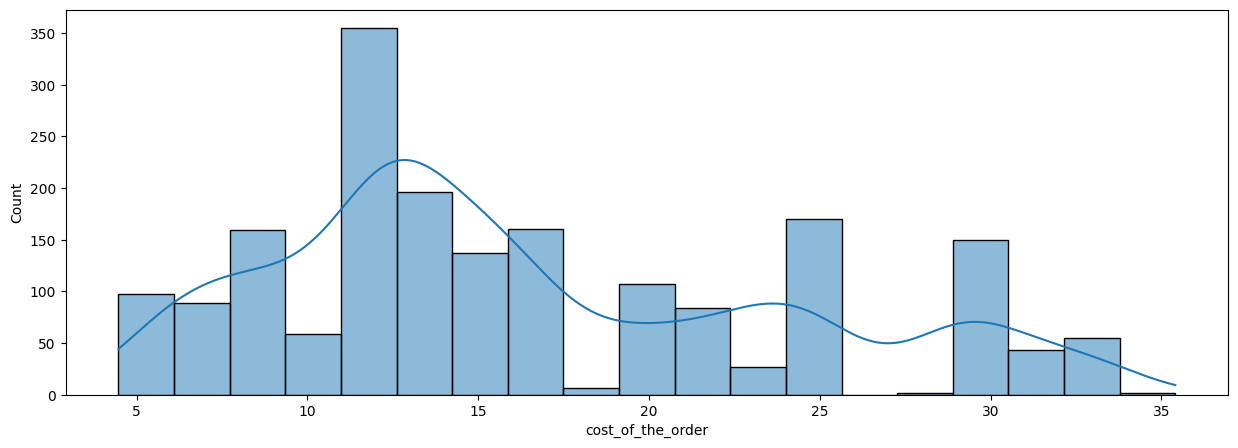

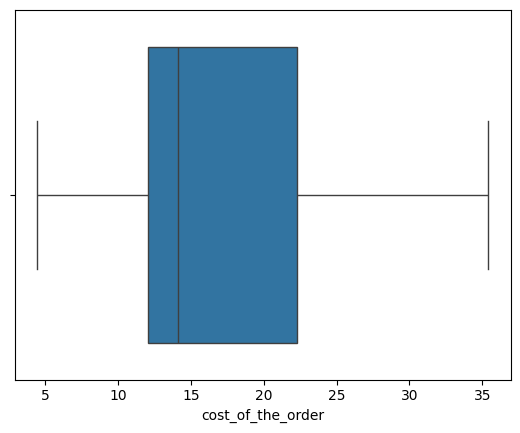

In [255]:
# Histogram plot as part of Univariate analysis on numerical data of cost_of_the_order with KDE - Kernel Density Estimation
plt.figure(figsize = (15,5))
sns.histplot(data=df,x='cost_of_the_order',kde=True) ## Histogram for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

- The distribution of 'cost_of_the_order' field is slightly skewed towards right or positively skewed.
- There are no outliers present in this field.
- From the central tendency, we could infer mean / median are around 15 dollars for an order in New York from the data given.

In [256]:
# Check the unique values of field 'day_of_the_week'
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

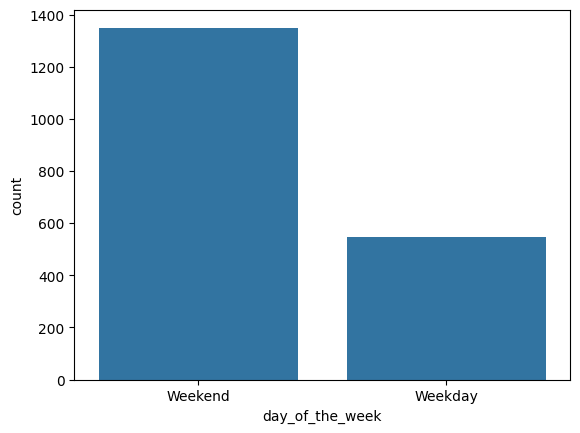

In [257]:
# Bar chart or countplot on the Categorical data, depicts the total count of days of the week, distributed between weekdays and weekend
sns.countplot(data = df, x = 'day_of_the_week')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* As the data set does not include the Order date field, we are not able to conclude if it is pre or post COVID-19 pandemic, however it is evident that foods orders are significantly higher over weekends vs weekdays.
* Probable reasons could be employees working from office on weekdays, would prefer dining in the restaaurants close to their offices as opposed to ordering on an aggregator like FoodHub, while weekends provides the opportunity for people to cherish food with the family members.

In [258]:
# The above chart depiction can also be done, using the value_count() function
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


In [259]:
# Check the unique values of raing field
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

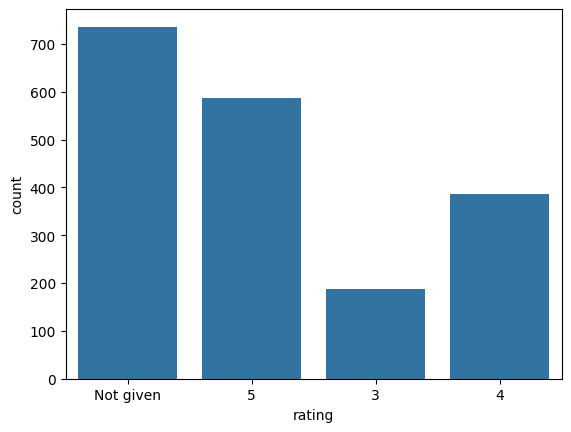

In [260]:
# Barplot or countplot of categorical field rating, provides the distribution of the ratings
sns.countplot(data = df, x = 'rating')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* There are around 736 orders for which there are no ratings given
* The above graph can also be depicted using the value_count() on the rating field as below, with no ratings found < 3 - indicating better quality of food or service provided by FoodHub.

In [261]:
# The above chart depiction can also be done, using the value_count() function
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


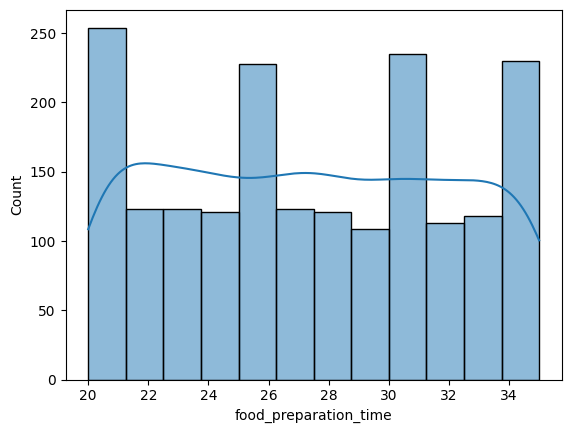

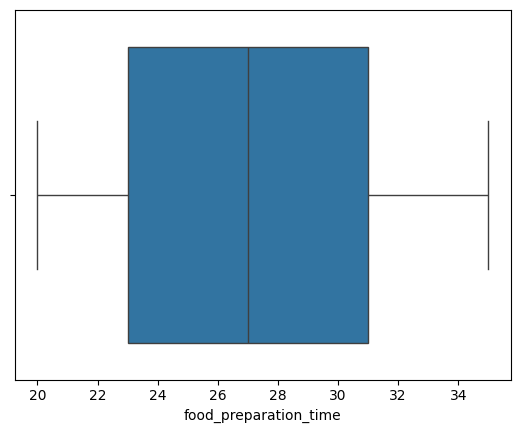

In [262]:
# Histogram plot as part of Univariate analysis on numerical data of food_preparation_time with KDE - Kernel Density Estimation
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* 'food_preparation_time' field has a normal distribution, with it's mean ~ median.
* There are no outliers present in this field, and the average food preparation time is around 27 minutes, which can be slightly higher with it's max value at 35 mins - this is to be reviewed by FoodHub, as a longer wait time for food - could lead to poor ratings from Customer's perspective.

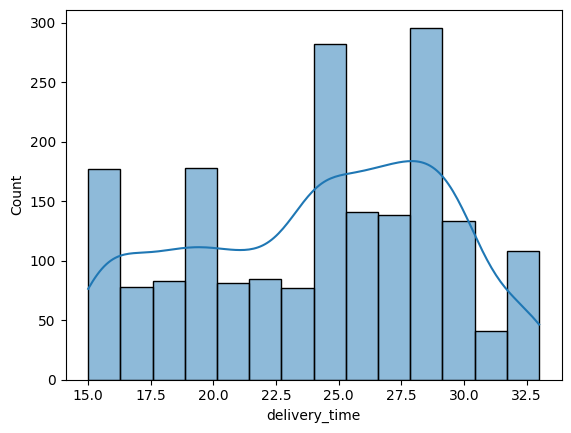

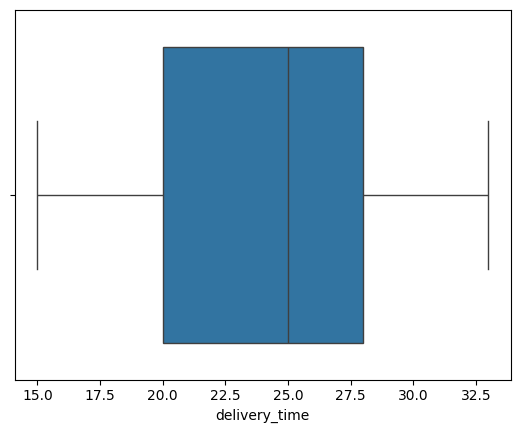

In [263]:
# Histogram plot as part of Univariate analysis on numerical data of delivery_time with KDE - Kernel Density Estimation
sns.histplot(data=df,x='delivery_time',kde=True)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* The distribution of 'delivery_time' field is slightly skewed towards left or negatively skewed, with it's mean < median.
* There are no outliers present in this field.
* It would be interesting to understand the split of the delivery time over the weekends and weekdays, while on an average it is around 24 mins (overall) - indicating people weigh taste of the food, over the proximity of the restaurant to their homes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [264]:
# Write the code here
# Head() will provide only 5 records of output, while when the number of records are counted, specific to the restaurant name field, only the top 5 appear in descending order of the count
df['restaurant_name'].value_counts().sort_values(ascending=False).head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in terms of orders received.

* Alternatively, answer to this question can also be obtained using the below solution, as explained in Comments section.

In [265]:
# Create a new Dataframe called df_1 with all the counts of restaurants, grouped by restaurants
df_1 = df.groupby(['restaurant_name'])['restaurant_name'].value_counts()
# Using head() function we display only the top 5 records, with the new dataframe object's count values being sorted in descending order using sort_values()
df_1.sort_values(ascending=False).head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [266]:
# Write the code here
# Create a new Dataframe called df_2 by filtering only weekends using loc, and counting the number of records, as they are grouped on Cuisine types
df_2 = df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()
# Head() function on the new dataframe lists in descending order along with sort_values(), thus providing us the most popular cuisine type on Weekends
df_2.sort_values(ascending=False).head()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:

* American cuisine type is the most popular on weekends, based on 415 orders, while the next popular cuisine_type is Japanese with a distant 335 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [267]:
# Write the code here
# Create a new Dataframe called df_3 by filtering orders costing more than 20 dollars
df_3 = df.loc[df['cost_of_the_order']>20]
# pd3.shape[0] represents the number of orders / records in this new df_3 dataframe, which is used in computing the % of orders against the given file df row count
Percentage_of_orders = (df_3.shape[0]/df.shape[0])*100
print(Percentage_of_orders)

29.24130663856691


#### Observations:
* 29.24% of the total orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [268]:
# Write the code here
# Using the mean() on the delivery_time field, we could determine the mean order delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* 24.16 mins or 24 mins and 9.6 seconds is the mean/average order delivery time

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [269]:
# Write the code here
# Create a new Dataframe called df_4 by counting the number of orders made by each of the customers
df_4=df['customer_id'].value_counts()
# Then upon sorting the new datafram only to display the top 3 records in descending order, would provide the Top 3 most frequent customers in placing food orders.
df_4.sort_values(ascending=False).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* The Top 3 most frequent customers who would receive the 20% discount vouchers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders being placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


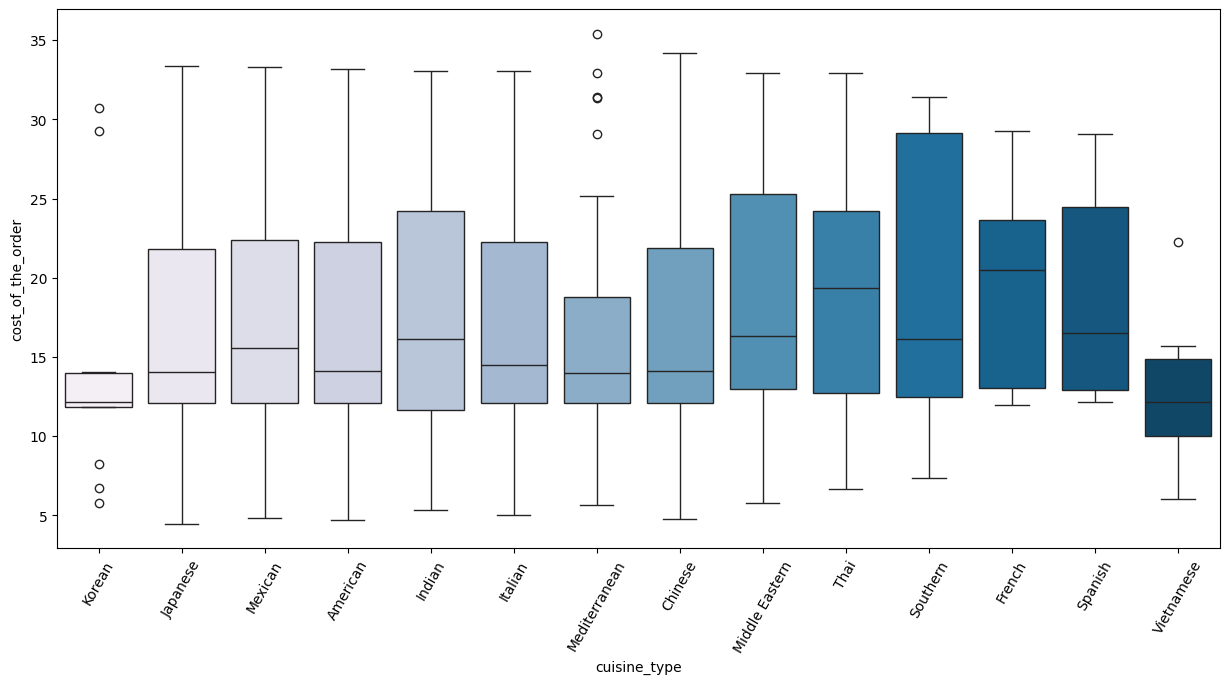

In [270]:
# Write the code here
# Relationship between cost of the order and cuisine type - Categorical vs Numerical analysis
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* Japanese cuisine cost the least amount, while Mediterranean cuisine is the costliest of all, because of its outliers on the positve side.
* Korean cuisine has outliers on both sides, while Vietnamese and Mediterranean have outliers only on the positive side, while the rest have no outliers at all.
* IQR (Inter Quartile Range) distribution of Souther cuisine is the largest than the equivalent from other cuisine types.


In [271]:
# The above observations can be justified by the below dataframe
df.groupby(['restaurant_name','cuisine_type'])['cost_of_the_order'].max().sort_values(ascending = False).head(5)

,,cost_of_the_order
restaurant_name,cuisine_type,
Pylos,Mediterranean,35.41
Han Dynasty,Chinese,34.19
Blue Ribbon Sushi,Japanese,33.37
Nobu Next Door,Japanese,33.37
Tres Carnes,Mexican,33.32


In [272]:
# The above observations can be just# The above observations can be justified by the below dataframe
df.groupby(['restaurant_name','cuisine_type'])['cost_of_the_order'].min().sort_values(ascending = True).head(5)

,,cost_of_the_order
restaurant_name,cuisine_type,
Nobu Next Door,Japanese,4.47
The Loop,Japanese,4.66
P.J. Clarke's,American,4.71
Shake Shack,American,4.75
RedFarm Hudson,Chinese,4.75


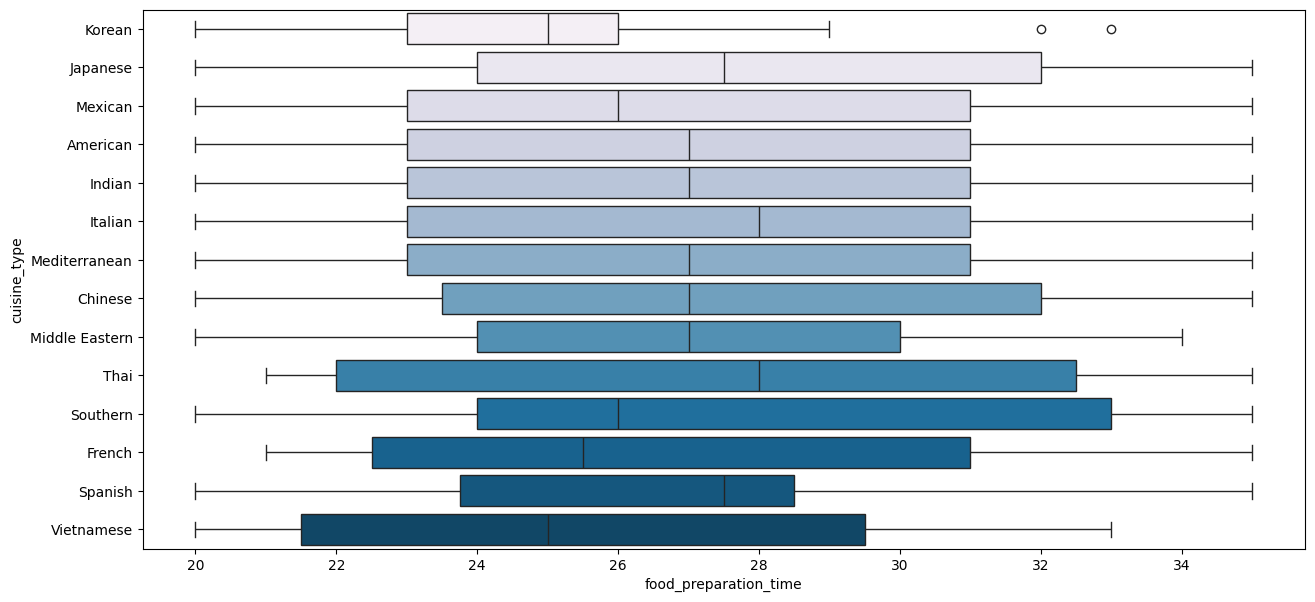

In [273]:
# Understanding the relationship between food preparation time and cuisine type - Numerical vs Categorical
plt.figure(figsize=(15,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* Except Thai and French cuisines, all others have a minimum cooking time of 20 minutes for food orders.
* And except Korean, Middle Eastern and Vietnamese cuisines, the rest have a maximum cooking time of 30 minutes.
* Korean cuisine has outliers only on the positive side, while the rest have no outliers at all.
* From the central tendency of the above boxplot graphs, the average cooking time for all cuisines types except Korean takes around 26 to 27 minutes.

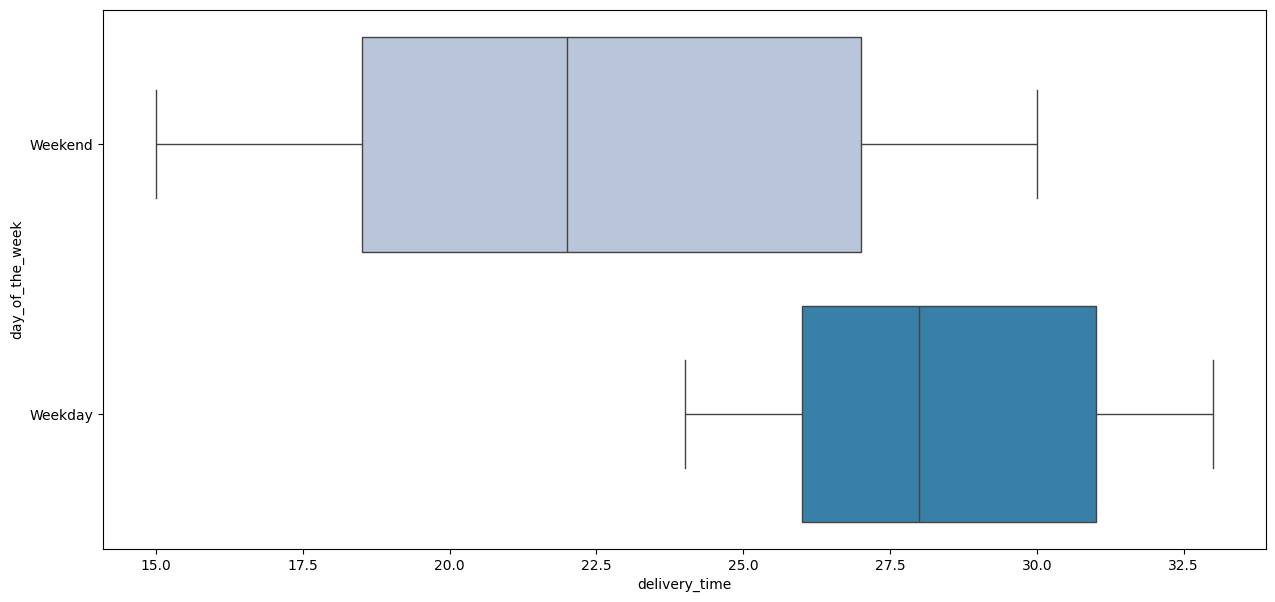

In [274]:
# Relationship between day of the week and delivery time - Categorical vs Numerical analysis
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* Time of delivery on the weekdays is high when compared against the weekends.
* The average delivery time over the weekends is around 22.50 minutes or 22 mins and 30 seconds is lower than the average delivery time over the weekends, which is around 28 mins. This could be attributed to following factors:-

(A): Weekend traffic is not heavy, leading to quicker delivery time
(B): The delivery employees are travelling quicker from restaurant to delivery address and are even more swifter to use the weekends tio bag more orders, implying more revenue for the food delivery (as opposed to weekends).

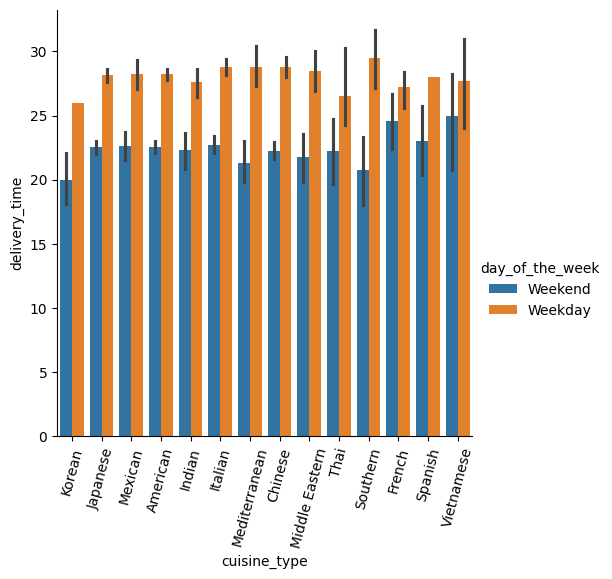

In [275]:
# Relationship between day of the week and delivery time - Categorical vs Numerical analysis
sns.catplot(x = "cuisine_type", y = "delivery_time", data = df, kind="bar", hue = "day_of_the_week")
plt.xticks(rotation=75)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* Observations of the above graph, are similar to the box plot made above. However by cuisine type, the delivery time is depicted in a vertical bar chart - confirming the understanding that the delivery time for the weekend is less than that of the weekdays and is as inferred based on the legend: day_of_the_week.

In [276]:
# Code to list down the top 10 restaurants by revenue
df.groupby(['restaurant_name','cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index().head(10)

,restaurant_name,cuisine_type,cost_of_the_order
0,Shake Shack,American,3579.53
1,Blue Ribbon Sushi,Japanese,1903.95
2,The Meatball Shop,Italian,1821.01
3,Blue Ribbon Fried Chicken,American,1662.29
4,Parm,Italian,1112.76
5,RedFarm Broadway,Chinese,965.13
6,RedFarm Hudson,Chinese,921.21
7,TAO,Japanese,834.50
8,Han Dynasty,Chinese,755.29
9,Blue Ribbon Sushi Bar & Grill,Japanese,666.62


* Shake Shack of American cuisine, Blue Ribbon Sushi of Japanese cuisine and The Meatball Shop of Italian cuisine are the top 3 restaurants by gross revenue - benefitting the most from the FoodHub aggregator.

In [277]:
# Rating field is of object / string data type, while for multivariate analysis - it would be ideal to convert it to int64
# First let us get only the records with the ratings given and the implications of type casting to integer for the rating field would not be affected with the copy() function being used
df_ratings_only= df[df['rating'] != 'Not given'].copy()

# As we need to perform conditional operation on the rating field, it would be better to have it converted from string/object data type to integer
df_ratings_only['rating'] = df_ratings_only['rating'].astype('int64')

df_ratings_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


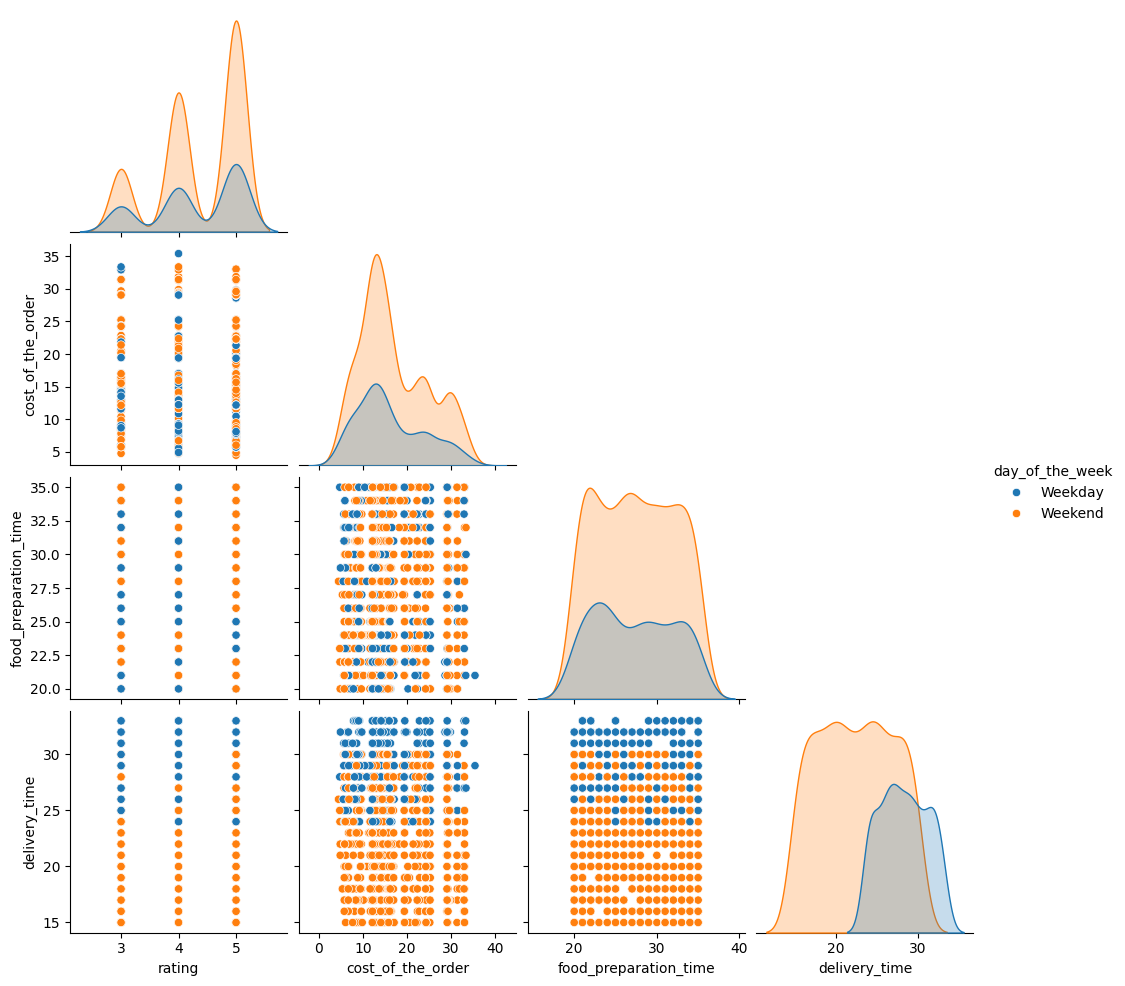

In [278]:
# Multivariate analysis using HeatMap and Pairplot can be done on - Numerical vs Numerical records analysis
sns.pairplot(data = df_ratings_only, vars = ['rating','cost_of_the_order','food_preparation_time','delivery_time'],corner=True,hue='day_of_the_week')
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()


* The pairplot is comprehensive to assimilate information from, however it enables us to quickly understand the distribution pattern for a numerical vs numerical analysis.
* Some quick observations are:-
(A) time to deliver food is directly proportional to the food preparation time, which could be purely co-incidental inference.
(B) Weekdays take a lot of time to deliver food as opposed to on weekends
(C) From the rating perspective, there is an even ditribution against each of time to deliver food, food preparation and cost of the food as well. To dig deeper into this let us create pointplots on this analysis further.

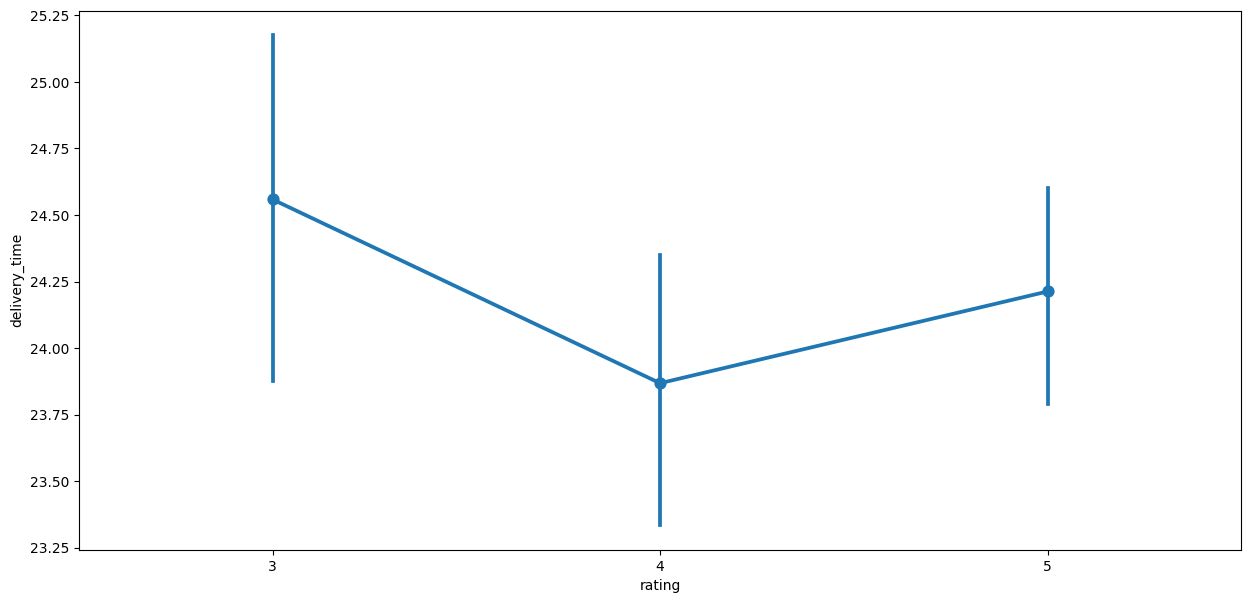

In [279]:
# Relationship between rating and delivery time - Numerical vs Numerical analysis
plt.figure(figsize=(15,7))
sns.pointplot(x = "rating", y = "delivery_time", data = df_ratings_only)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* When the delivery_ time of food is higher, the ratings have been lower. We could argue with smaller delivery times, the mood of the end Customers is influenced to provide a higer rating - but without the context / text analytics on the comments - it would be very difficult to conclude this understanding !

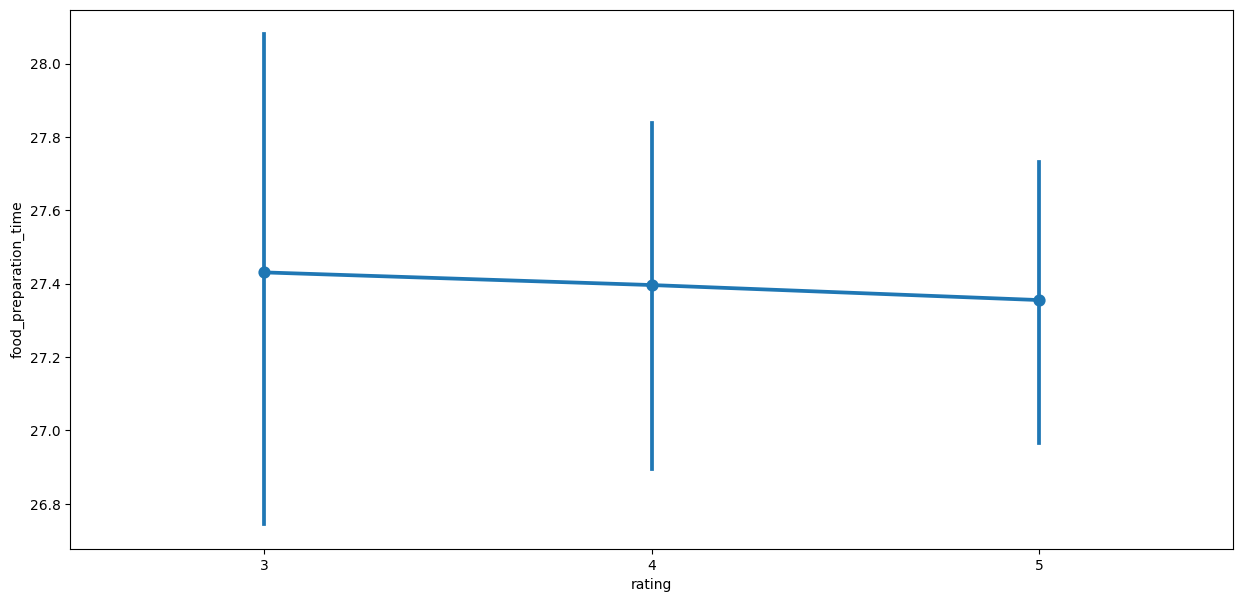

In [280]:
# Relationship between rating and food preparation time - Numerical vs Numerical analysis
plt.figure(figsize=(15,7))
sns.pointplot(x = "rating", y = "food_preparation_time", data = df_ratings_only)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* From the above pairplot, it is inconclusive if there is co-relation between food_preparation_time and the ratings given

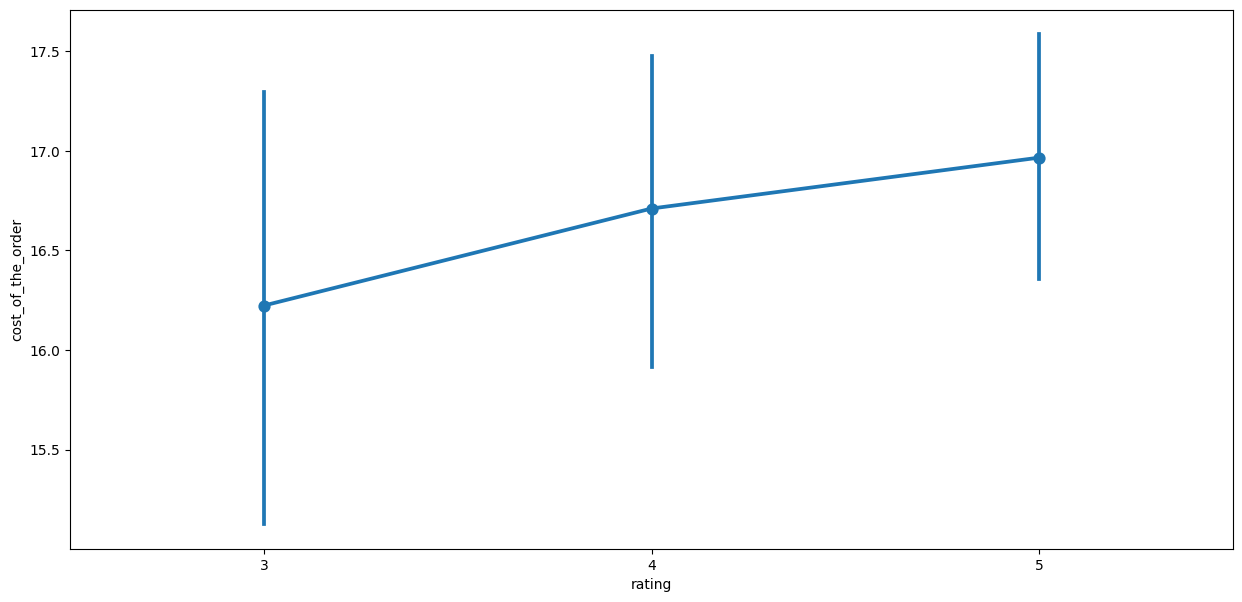

In [281]:
# Relationship between rating and cost of the order - Numerical vs Numerical analysis
plt.figure(figsize=(15,7))
sns.pointplot(x = "rating", y = "cost_of_the_order", data = df_ratings_only)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

* From the above chart, we could infer that as the cost of the order increases, the rating increases as well, therefore they are directly proportional to each other.
* So people ready to pay more on the food, also provide a higher rating

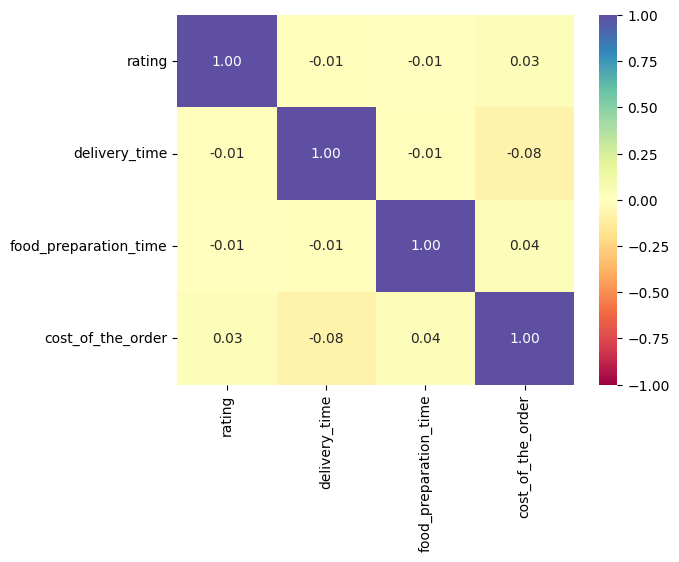

In [282]:
# Correlation among the above 4 numerical variables can be visualized using a heat map
list_of_columns = ['rating','delivery_time', 'food_preparation_time','cost_of_the_order']
sns.heatmap(df_ratings_only[list_of_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


* Heat Map illustrates the matrix of co-relation and this is a highly negatively co-related matrix, with the exception of
(A): Cost of the order vs rating (and)
(B): cost of the order vs food preparation time, the rest of the analysis is negatively corelated.
* It is important to note that correlation does not imply causation

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [283]:
# Write the code here
# First let us get only the records with the ratings given and the implications of type casting to integer for the rating field would not be affected with the copy() function being used
df_ratings_given = df[df['rating'] != 'Not given'].copy()

# As we need to perform conditional operation on the rating field, it would be better to have it converted from string/object data type to integer
df_ratings_given['rating'] = df_ratings_given['rating'].astype('int64')

# Create a new dataframe as df_5 to ascertain the rating count of more than 50, for each of the restaurants and we arrange the records in the descending order of count
# For count to be accessible in the next lines of code, we impart the logic using reset.index() dunction
df_5 = df_ratings_given.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_5

# Filtering out restaurants only into a series of datafram containing only with rating count > 50
df_restaurants_rating_count_filter = df_5[df_5['rating'] > 50]['restaurant_name']

# Now we try to get all the records of the df_ratings_given and filter only the restaurants, who have rating count > 50
# dropna() function is not needed because, df_6 is derived from the df?_ratings_given dataframe with the null values on ratings already removed
df_6 = df_ratings_given[df_ratings_given['restaurant_name'].isin(df_restaurants_rating_count_filter)].copy()

# On these filtered dataframe df_6, we should apply the filtering of restuarant's rating average > 4
df_7 = df_6.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

# Checking the condition on the df_7, to infer the names of the restaurants with the mean rating > 4
# In the final output df_8 with just the restaurant names, an additional index column gets added, which is removed using the parameter of drop = True in reset_index() function
# Also the final dataframe df_8 with restaurant_names and rating is sorted in the descending order based on the mean rating values and then displayed in the output in sequence
df_8 = df_7[df_7['rating'] > 4].sort_values(by='rating',ascending=False).reset_index(drop=True)
df_8

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* The following four restaurants qualify for the promotional offer in the advertisements, as they have a minimum of 50 ratings and the quality of the food is also judged to be good, with their average rating being greater than 4 are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [284]:
# Write the code here
# We are defining a new custom function called charges_levied, as it would be applyied for all the rows of the dataset - for each value of the column 'cost_of_the_order'
def charges_levied(price_of_food):

# IF the price of the food is > 20 dollars, then the charges levied by the food order company would be 25% of the cost of the food
  if price_of_food > 20:
    price_of_food = price_of_food * 0.25
# If the price of food is > 5 dollars only and less than 20 dollars, then the charges levied by the food order company would be 15% of the cost of the food
  elif price_of_food > 5:
    price_of_food = price_of_food * 0.15
# In other scenarios of the price of food, being less than 5 dollars, the charges levied by the food order company is 0
  else:
    return 0
  return price_of_food

# Introducing a new column in the Food order data set as Revenue_from_Foodorder and using the apply() function the column value of cost_of_the_food is innately passed on as the parameter of our custom function
df['Revenue_from_Foodorder'] = df['cost_of_the_order'].apply(charges_levied)
df.head(1000)

# Total revenue of the Company across all the Orders
Net_revenue = df['Revenue_from_Foodorder'].sum()
print('Net revenue of the Company across all the orders',Net_revenue,'dollars')


Net revenue of the Company across all the orders 6166.303 dollars


#### Observations:

* The final revenue or net revenue for the Company across all the Orders is 6166.30 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [285]:
# Write the code here
# Introduce a new column in the data as time_to_deliver_food, which is the summation of the time taken to prepare and then deliver food
df['time_to_deliver_food'] =  df['food_preparation_time'] + df['delivery_time']
df.head(1000)

# In a new data fram df_9, we will retain only those records whose food preparation time is > 60 minutes
df_9 = df[df['time_to_deliver_food'] > 60]

# Percentage of orders taking more than 60 minutes to get delivered is ascertained by the number of rows of df_9 divided by overall row count of data set at 1898
Percentage_of_orders = (df_9.shape[0]/df.shape[0])*100
print('Percentage of Orders taking more than 60 minutes to get delivered is', round(Percentage_of_orders,2),'%')


Percentage of Orders taking more than 60 minutes to get delivered is 10.54 %


#### Observations:

* Total time required to deliver the food is ascertained in the dataset df as time_to_deliver_food and is used to compute the percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is computed to be 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [286]:
# Write the code here
Delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The average delivery time over the weekdays is',round(Delivery_time_weekday,2),'minutes')


The average delivery time over the weekdays is 28.34 minutes


In [287]:
Delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The average delivery time over the weekends is',round(Delivery_time_weekend,2),'minutes')

The average delivery time over the weekends is 22.47 minutes


#### Observations:

* The average delivery time over the weekends is 22.47 minutes or 22 mins and 27 seconds is lower than the average delivery time over the weekends, which is 28.34 mins or 28 mins and 20 seconds. This could be attributed to following factors:-

(A): Weekend traffic is not heavy, leading to quicker delivery time
(B): The delivery employees are travelling quicker from restaurant to delivery address and are even more swifter to use the weekends tio bag more orders, implying more revenue for the food delivery (as opposed to weekends).

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  We analyzed the FoodHub aggregator dataset of 1898 orders, from the New York city. The main feature of interest is on ascertaining the total time to deliver food, which I believe is a key factor influencing on the ratings of the service.
Context on the rating details is not provided, as to whether these ratings are on the service of the Food aggregator or are they based on the quality / food taste. I as a Data Scientist would be keen on seeking for text analytics on the Comments to infer the sentiment of the feedback. The end goal is on optimizing the overall time taken for the food to be prepared, while it's hot as quickly as possible from the time it's ordered, prepared and delivered to the end Customers efficiently. From the dataset givenm we could infer the following insights / conclusions:-

1. Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in terms of orders received.
2. American cuisine type is the most popular on weekends, based on 415 orders, while the next popular cuisine_type is Japanese with a distant 335 orders.
3. Around 70% of the food orders cost less than 20 dollars, implying FoodHub is pre-dominantly budget friendly with the Customers.
4. Average delivery time of food is still on the higher side at about 24 minutes, and notably the weekdays take a lot of time for delivery over weekends.
5. The net revenue for the Company across all the orders is $6166.30
6. Top performing restaurants with a minimum rating count of 50 and their average rating  greater than 4 are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi.
7. For around 736 records, we do not have ratings - which is a key lever of information to ascertain the performance of the company.


### Recommendations:

*  My key recommendations to help improve the Business are classified by:-

1. **Cuisine types:** There are lot of takers for American, Japanese, Italian and Chinese are top 4 cuisine types, so FoodHub should target tie-up with promoting it's Aggregator application with the restaurants featuring these cusine types. This is non-negotiable as it would definitely help promote FoodHub's revenue further.
2. **Rewards program:** Conduct a rewards program with fancy gift items, this Competition would entice interest from all the Customers and with offering payment free food, then footfall of Customers would increase.
3. **Promotional Offers:** Providing discounts on the food, for any customer ordering more than 10 orders would promote business - as from the data, we find there is only two customers with more than 10 orders.
4. **Promoting on social media:** Promote app based offers and advertise all the rewards/promotional offers in social media - to potentially add to the Customer base as the current customer base is 1200, but they approximately place 2 orders.
5. **Delivery time:** The delivery time of the food is higher in the case of weekdays, as opposed to weekends. Further investigation on this could lead to understand if using the public transports within the mainland city like Metros, could help with improved delivery time as opposed to be stuck in long traffice during peak times.
6. **Time to prepare and deliver food:** About 10% of the orders take more than 60 minutes for them to be prepared and delivered, this could adversely lead to an imapct on the Customer Satisfaction. Hence, providing an ETA of food to be delivered, can help appease a disgruntled Customer and The Company has to take steps to assign such deliveries to MVP - Most Valuable Players, who are rated highly in terms of delivery to pick such orders - as classified orders.
7. **Ratings:** Firstly, about 736 orders out of 1898 do not have a rating. As this is a key lever for Feedback mechanism - encouraging users with incentives in order to cast vote and capture a detailed feedback, wil help the Company work on a targeted problem, if the issue is with food quality or service provided, could be addressed accordingly.


---